# TABLE OF CONTENTS
 ## GENERAL OVERVIEW
* About Project
* Data Dictionary
* Import Libraries

 ## DATA ANALYSIS
     * Import datasets
     * Data Cleaning And Data Wrangling
     * Data Visualization
    
 ## MACHINE LEARNING
     * Data Preprocessing
     * Creating a Baseline Model
     * Splitting Data
     * Training and Fitting of Models
     * Tuning Model
     * Predicting Target Vector Using Feature Variables
        
 ## COMMUNICATING TO EXTERNAL STAKEHOLDERS
     * Features That Are Important To Predict House Prices In Ames
     * Blog Post About This Project Can Be Found [here](https://t.co/tSwYGggspE)
     * Project DashBoard Can Be Found Here
     
       

## GENERAL OVERVIEW


## About Project

   This project is a data science and machine learning project. It is about using machine learning to predict House price in Ames. The model is scored using Root Mean Squared Log Error.
   The trained dataset used for this project has 81 columns which are listed in the data dictionary and 1460 rows (there are columns with missing rows in this dataset

## Data Dictionary
  The data set and data dictionary used for this project can be found [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

## IMPORT LIBRARIES

In [1]:
import pandas as pd # For data analysing...who doesnt love pandas (winks)
import matplotlib.pyplot as plt  # for all the amazing visualization
import numpy as np  # for all the math stuffs
import seaborn as sns  # another visualization tool cos why not?
from sklearn.metrics import mean_squared_log_error   # Evaluation Metrics
from sklearn.linear_model import Ridge # Regression models
from sklearn.pipeline import make_pipeline   # for preprocessing the data
import math    
from sklearn.model_selection import train_test_split   # for splitting the data

## DATA ANALYSIS
* Data Cleaning And Data Wrangling

In [2]:
# Import data
train_data= pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

**NOTE:** Normally, the test dataset wont be available but because it is available to us, and there are missing data in both train and test data, we either build a wrangle function to take care of the missing data or join the two dataset together and work on them after which it will be splitted

In [7]:
# join the two dataset together#
df= pd.concat([train_data, test_data])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

**NOTE**: According to the project instructions, there are some features e.g fence, alley that are 'NOT AVAILABLE / NA' but they are labelled NAN, so they will be changed to NA

In [9]:
# Fill features that are supposed to be "not available" but are missing value to NA
df['Alley'].fillna('NA', inplace= True)
df['BsmtQual'].fillna('NA', inplace= True)
df['BsmtQual'].fillna('NA', inplace= True)
df['BsmtExposure'].fillna('NA', inplace= True) 
df['BsmtFinType1'].fillna('NA', inplace= True)
df['BsmtFinType2'].fillna('NA', inplace= True)
df['FireplaceQu'].fillna('NA', inplace= True)       
df['GarageType'].fillna('NA', inplace= True)      
df['GarageFinish'].fillna('NA', inplace= True)  
df['GarageQual'].fillna('NA', inplace= True)      
df['GarageCond'].fillna('NA', inplace= True) 
df['PoolQC'].fillna('NA', inplace= True)           
df['Fence'].fillna('NA', inplace= True)           
df['MiscFeature'].fillna('NA', inplace= True) 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## DATA VISUALIZATION

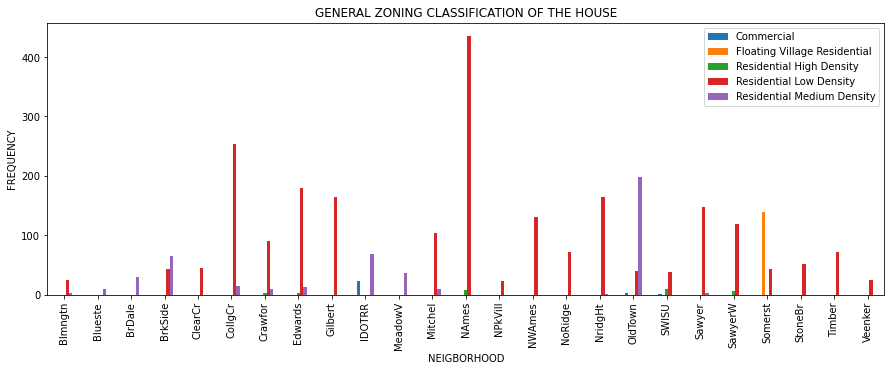

In [11]:
# relationship between general zoning classification of the sale and neighborhood
pd.crosstab(df['MSZoning'],df['Neighborhood']).T.plot.bar(figsize= (15,5))
plt.xlabel('NEIGBORHOOD')
plt.ylabel('FREQUENCY')
plt.title('GENERAL ZONING CLASSIFICATION OF THE HOUSE')
plt.legend(['Commercial','Floating Village Residential','Residential High Density','Residential Low Density',
            'Residential Medium Density']);

**NOTE**

General zoning classification of the sale of the house keywords are explained by google here

**Commercial Area Zone**: it is a real estate intended for use by for-profit-interest businesses such as office complexes, shopping malls, service stations and restaurants

**Floating Village Residential**: A village residential consist of a single-family dwelling unit constructed on a float, that is moored, anchored, or otherwise secured in waters

**Residential High Density**: High Density Residential means land to be utilized for residential purposes, including public housing and industrialized units, which does not exceed thirty-two dwelling units per gross acre

**Residential Low Density**: Low density housing typically refers to residential areas occupied primarily by single-family homes or buildings with a small number of units

**Residential Medium Density**: Medium Density Residential (MDR) is a category intended to provide compact medium to high density residential development and transitional uses between low density residential uses and higher density residential uses, commercial uses and public and semi-public use areas

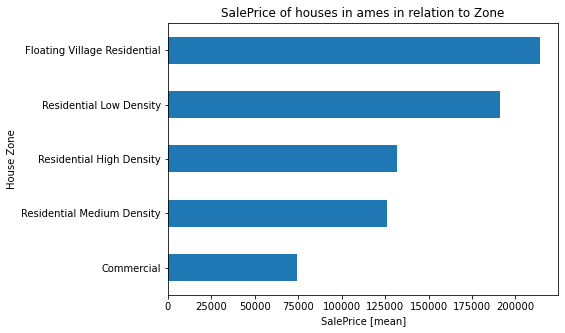

In [12]:
# looking at the insight gotten from data above, lets see the zone that have the most expensive housing rate
price_vs_msz= df['SalePrice'].groupby(df['MSZoning']).mean().sort_values()
price_vs_msz.plot.barh(figsize= (7,5))
plt.ylabel('House Zone')
plt.xlabel('SalePrice [mean]')
plt.title('SalePrice of houses in ames in relation to Zone')
plt.yticks(ticks= [0,1,2,3,4], 
          labels=['Commercial','Residential Medium Density', 'Residential High Density',
                  'Residential Low Density','Floating Village Residential'
                 ]);

**INSIGHT**

WOW, looking at this, houses in floating village residential is the most expensive followed by houses in residential low density and residential high density

Lets look at another feature

In [13]:
df['SqFtOfRm']= df['GrLivArea']/df['TotRmsAbvGrd'] + df['FullBath']+ df['HalfBath'] + df['KitchenAbvGr']
df['Home_Qual']= (df['OverallCond'] + df['OverallQual'])/2
df['TotBath']= df['FullBath'] + 0.5 *df['HalfBath']
df['HighQualSf']= df['1stFlrSF'] + df['2ndFlrSF']

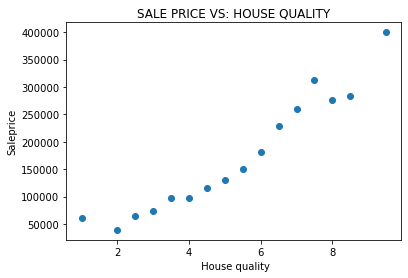

In [14]:
# is there any relationship between home quality and price?
price_vs_hq= df['SalePrice'].groupby(df['Home_Qual']).mean().sort_values()
plt.scatter(x= price_vs_hq.index, y= price_vs_hq.values)
plt.ylabel('Saleprice')
plt.title('SALE PRICE VS: HOUSE QUALITY')
plt.xlabel(' House quality');

 **NOTE**: There is a direct positive correlation between house quality and price of house but there are outliers in the dataset

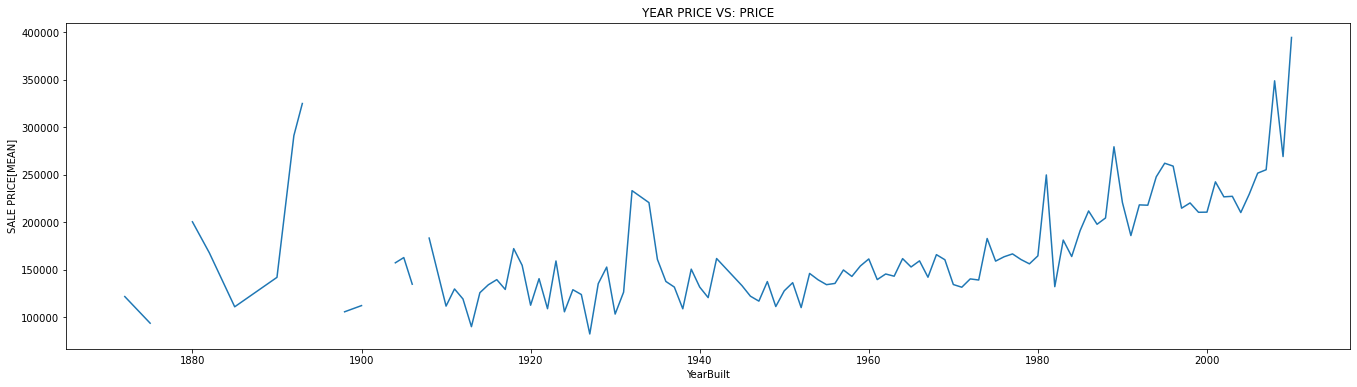

In [15]:
# Year Built vs Sale Price
price_vs_yr= df['SalePrice'].groupby(df['YearBuilt']).mean()
price_vs_yr.plot(figsize= (23,6))
plt.ylabel('SALE PRICE[MEAN]')
plt.title('YEAR PRICE VS: PRICE');

 **NOTE:** Year do not have any relationship with sale price of houses in Ames

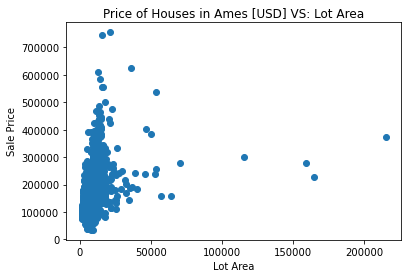

In [16]:
# create a scatter plot of lot area and saleprice to check the relationship
plt.scatter(x= df['LotArea'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Lot Area')
plt.title('Price of Houses in Ames [USD] VS: Lot Area');

In [17]:
# There are outliers in the dataset

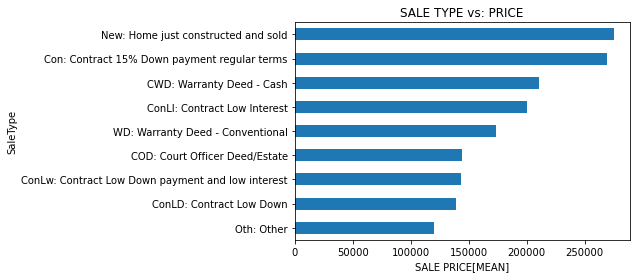

In [18]:
price_vs_st= df['SalePrice'].groupby(df['SaleType']).mean()
price_vs_st.sort_values().plot.barh()
plt.xlabel('SALE PRICE[MEAN]')
plt.title('SALE TYPE vs: PRICE')
plt.yticks(ticks= [4, 8, 3, 7, 2, 5, 1,0, 6],
           labels= ['WD: Warranty Deed - Conventional','New: Home just constructed and sold',
                    'COD: Court Officer Deed/Estate','Con: Contract 15% Down payment regular terms',
                    'ConLw: Contract Low Down payment and low interest',
                    'ConLI: Contract Low Interest', 'ConLD: Contract Low Down',
                    'Oth: Other','CWD: Warranty Deed - Cash']);

Text(0.5, 1.0, 'SALE TYPE vs: PRICE')

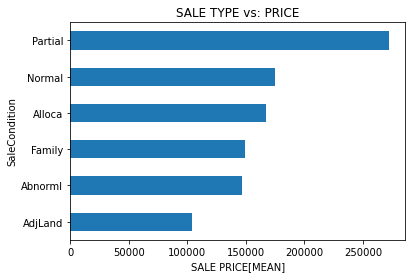

In [19]:
price_vs_st= df['SalePrice'].groupby(df['SaleCondition']).mean()
price_vs_st.sort_values().plot.barh()
plt.xlabel('SALE PRICE[MEAN]')
plt.title('SALE TYPE vs: PRICE')

## DATA PREPROCESSING

In [20]:
# Check for high categorical values and convert them
df.select_dtypes('object').nunique()

MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          4
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

In [21]:
df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

**NOTE**: We cant drop high categorical variables because neigborhood is an important feature in our dataset

<AxesSubplot:>

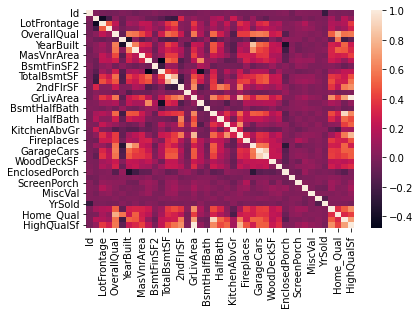

In [22]:
# lets check for correlation
sns.heatmap(df.drop('SalePrice', axis= 1).corr())

In [23]:
# Convert categorical features to numerical
new_df= pd.get_dummies(df)

In [24]:
# fill missing values with mean
new_df.fillna(new_df.mean(), inplace= True)

In [25]:
# drop features that have high correlation with each other
corr_mat= new_df.drop('SalePrice', axis= 1).corr()
list_feat= [item for item in corr_mat]
drop_feat= [] 
for i in range(len(list_feat)):
    for j in range (i+1, len(list_feat)):
        feat1= list_feat[i]
        feat2= list_feat[j]
        if abs(corr_mat[feat1][feat2]) > 0.8:
            drop_feat.append(feat1)

In [26]:
new_df.drop(columns= drop_feat, inplace= True)

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 272 entries, Id to SaleCondition_Partial
dtypes: float64(13), int64(20), uint8(239)
memory usage: 1.4 MB


In [28]:
# SPLIT THE DATA INTO TRAINING AND TEST SET
train_df= new_df[: 1460]
test_df= new_df[1460 :]

In [29]:
# Function that Remove outliers rows from trained dataset
def remove_outliers(dataset):
    low, high= np.percentile(dataset, [25,75])
    iqr= high-low
    lower_bound= low-(iqr*1.5)
    upper_bound= high+(iqr*1.5)
    return np.where((dataset > upper_bound)|(dataset < lower_bound))


# remove the outliers row
for col in train_df: 
    outlierlist= np.ndarray.tolist(remove_outliers(train_df[col])[0])
    new_train_df= train_df.drop(outlierlist)

In [30]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1459
Columns: 272 entries, Id to SaleCondition_Partial
dtypes: float64(13), int64(20), uint8(239)
memory usage: 666.2 KB


In [31]:
# Split the data into feature and target variables
X= new_train_df.drop(columns= 'SalePrice')
y= np.log1p(new_train_df['SalePrice'])

In [32]:
# create model
model= Ridge()

In [33]:
# split the data into training and validation split
X_train, X_val, y_train, y_val= train_test_split(X,y, test_size=0.2, random_state= 42)

# Create a Baseline Model

In [34]:
y_mean= y_train.mean()
y_pred_baseline= [y_mean]*len(y_train)
y_baseline_score= mean_squared_log_error(y_train, y_pred_baseline, squared= False)

print (f'The Baseline Score For This Project Is {round(y_baseline_score, 4)}')

The Baseline Score For This Project Is 0.029


In [35]:
# fit the model
model.fit(X_train, y_train)

Ridge()

In [36]:
# predict and score training data
y_pred= (model.predict(X_train))
score= mean_squared_log_error(squared= False, y_true= y_train,y_pred= y_pred)
(score)

0.006488871804405768

In [37]:
# predict and score validation data
y_pred_2= (model.predict(X_val))
score2= mean_squared_log_error(y_val, y_pred_2, squared= False)
(score2)

0.01040677313297938

In [38]:
solver= ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga']
training_acc= []
validation_acc=[]
for item in solver:
    model= Ridge(solver= item)
    model.fit(X_train, y_train)
    training_acc.append(mean_squared_log_error(squared= False, y_true= y_train, y_pred= model.predict(X_train)))
    validation_acc.append(mean_squared_log_error(y_val, model.predict(X_val), squared= False))

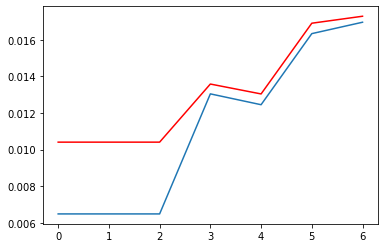

In [39]:
plt.plot(training_acc)
plt.plot(validation_acc, color= 'red')

# Our Prediction beat the baseline score so we will leave it like that And the tuned model has the same validation score as our first model

In [40]:
# Predict the sale price for test dataset
x_pred= np.expm1(model.predict(test_df.drop(columns= 'SalePrice')))

In [41]:
submission= pd.DataFrame({'Id':test_data['Id'], 'SalePrice':x_pred})
submission.head()

,Id,SalePrice
0,1461,131144.206439
1,1462,136900.972942
2,1463,169175.169916
3,1464,164226.253212
4,1465,152457.718810


In [42]:
# save submission file
submission.to_csv('submission.csv', index= False)

## Communication  And Summary

In [43]:
intercept= model.intercept_

In [44]:
coef= model.coef_

The prediction for this model is calculated using 
## y(price) = intercept + coef(feature 1) + coef(feature2)...coeff(last_feature)